# **Real Estate Price Prediction**

### **Content**

1.   Introduction
2.   Importing Libraries
3.   EDA

      3.1  Detailed Information of the Dataset

      3.2  Descriptive statistics of Dataset

      3.3  Visualization techniques
4.   Model Training & Testing

## **1. Introduction**

Real Estate Price Prediction is the process of estimating the future prices of properties like houses, apartments, or commercial buildings. The main aim is to help buyers, sellers, investors, and real estate professionals know the right property prices so they can make better decisions.

## **2. Importing Libraries**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. EDA**

In this section, the dataset will be imported and its features will be explained one by one.

In [109]:
# Load the dataset
real_estate_data = pd.read_csv("/content/Real_Estate.csv")

### **3.1 Detailed Information of the Dataset**

In [110]:
real_estate_data.shape

(414, 7)

In [111]:
real_estate_data.size

2898

In [112]:
real_estate_data.dtypes

,0
Transaction date,object
House age,float64
Distance to the nearest MRT station,float64
Number of convenience stores,int64
Latitude,float64
Longitude,float64
House price of unit area,float64


In [113]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [114]:
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,42:30.5,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,52:29.9,35.5,274.0144,2,25.012148,121.546990,24.970725
2,10:52.3,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,26:01.2,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,29:47.9,8.5,967.4000,6,25.011037,121.479946,21.654710


**Observation:** The dataset contains 7 columns. Here’s a brief overview
                 of the columns-

Transaction date: The date of the real estate transaction.

House age: Age of the house in years.

Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.

Number of convenience stores: Number of convenience stores in the vicinity.

Latitude: Latitude of the property location.

Longitude: Longitude of the property location.

House price of unit area: House price of unit area.

In [115]:
# check if the data contains any null values
real_estate_data.isnull().sum()

,0
Transaction date,0
House age,0
Distance to the nearest MRT station,0
Number of convenience stores,0
Latitude,0
Longitude,0
House price of unit area,0


**Observation:** There are no null values in the dataset

### **3.2 Descriptive statistics of Dataset**

In [116]:
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


### **3.3 Visualization techniques**

* **Exploring Data Distribution Using Histograms**




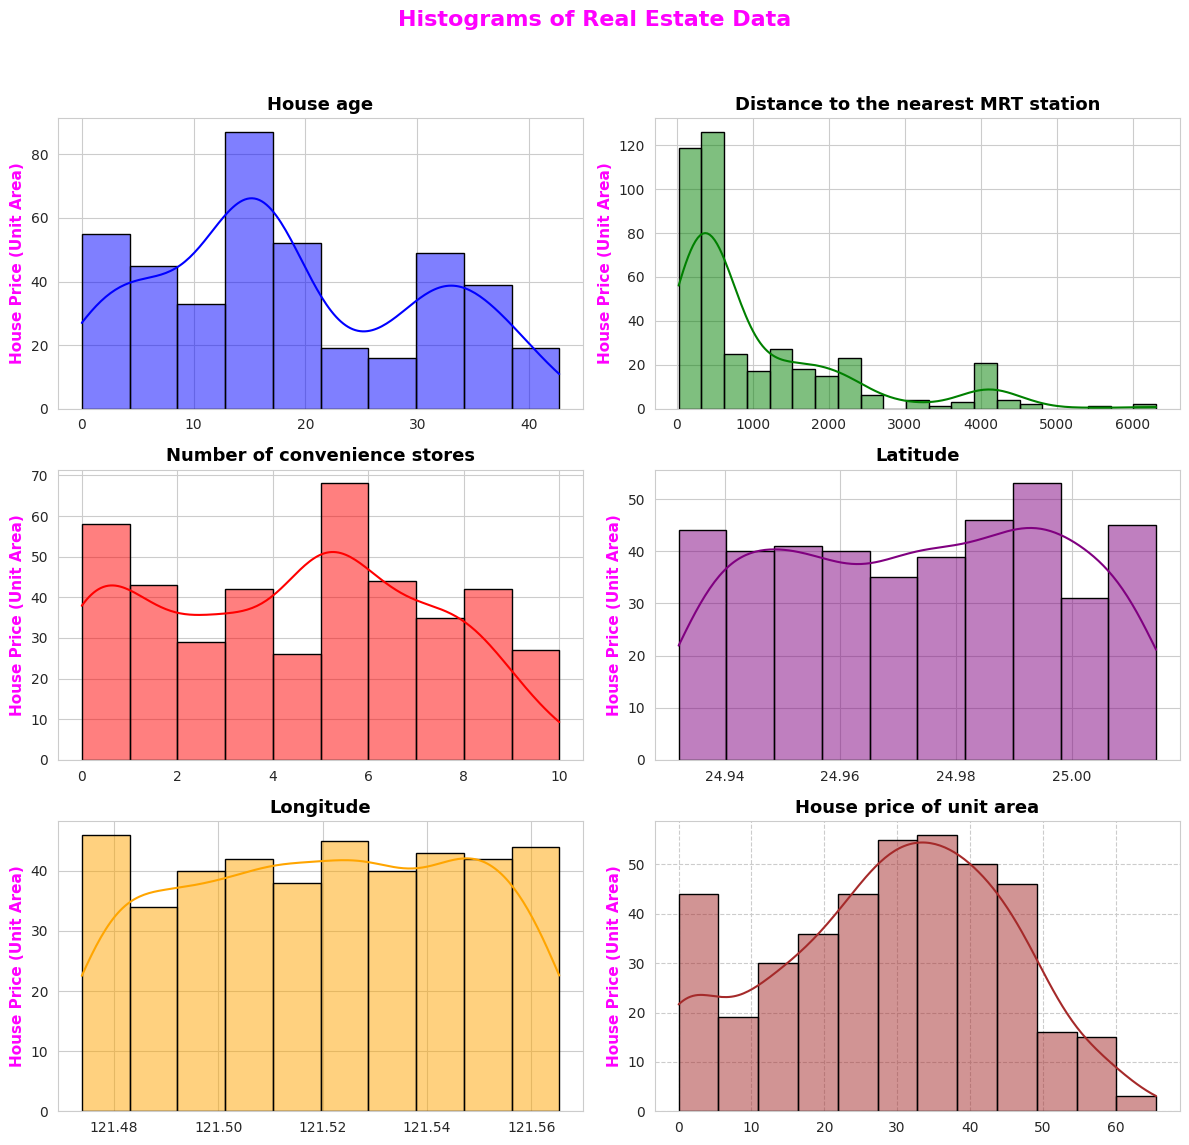

In [117]:
sns.set_style("whitegrid")
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize=16,  fontweight='bold',color='magenta')
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores',
        'Latitude', 'Longitude', 'House price of unit area']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for i, column in enumerate(cols):
    row, col = i // 2, i % 2
    sns.histplot(real_estate_data[column], kde=True,ax=axes[row, col],
                    color=colors[i % len(colors)],edgecolor='black')
    axes[row, col].set_title((column), fontsize=13, fontweight='bold', color='black')
    axes[row, col].set_xlabel('', fontsize=11, fontweight='bold', color='magenta')
    axes[row, col].set_ylabel("House Price (Unit Area)", fontsize=11, fontweight='bold', color='magenta')
axes[row, col].grid(True, linestyle="--")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observation:**

**House Age:** This shows a relatively uniform distribution with a slight increase in the number of newer properties (lower age).

**Distance to the Nearest MRT Station:** Most properties are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

**Number of Convenience Stores:** Displays a wide range, with notable peaks at specific counts, like 0, 5, and 10. It suggests certain common configurations in terms of convenience store availability.

**Latitude and Longitude:** Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.

**House Price of Unit Area:** Displays a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

* **Understanding House Price Trends via Scatter Plots**

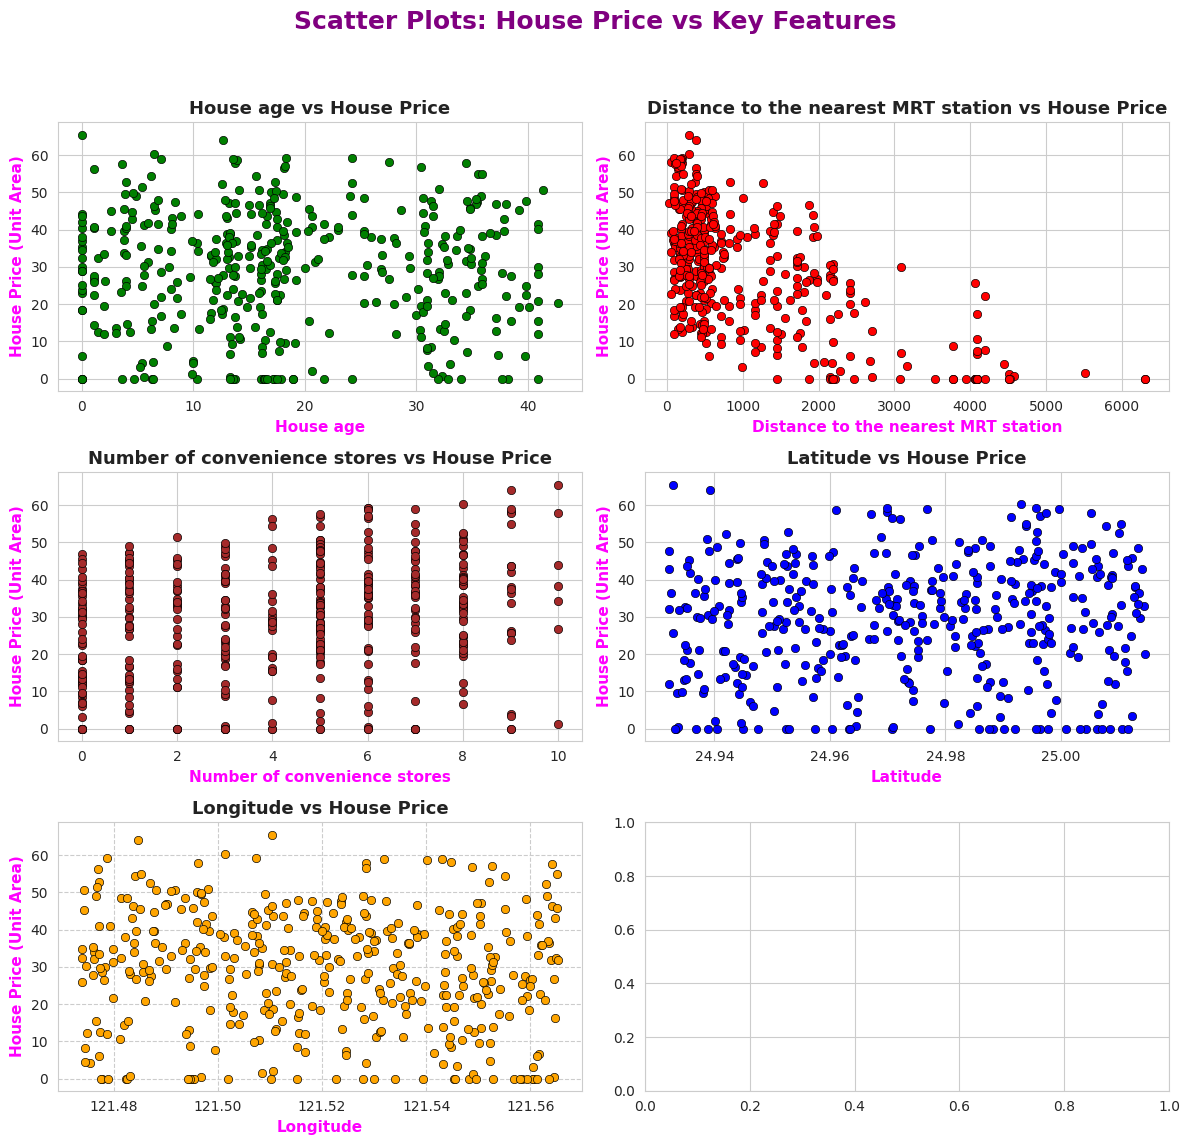

In [118]:
sns.set_style("whitegrid")
colors = ["green", "red", "brown", "blue", "orange"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Scatter Plots: House Price vs Key Features', fontsize=18, fontweight='bold', color='purple')
cols = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
for i, column in enumerate(cols):
    row, col = i // 2, i % 2
    sns.scatterplot(data=real_estate_data, x=column, y='House price of unit area',ax=axes[row, col],
                    color=colors[i % len(colors)],edgecolor='black', marker="o")
    axes[row, col].set_title(f"{column} vs House Price", fontsize=13, fontweight='bold', color='#222')
    axes[row, col].set_xlabel(column, fontsize=11, fontweight='bold', color='magenta')
    axes[row, col].set_ylabel("House Price (Unit Area)", fontsize=11, fontweight='bold', color='magenta')

axes[row, col].grid(True, linestyle="--")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Observations:**

**House Age vs. House Price:**  The points are widely scattered, suggesting no strong correlation between house age and price.House prices do not significantly depend on house age. Both new and old houses may have similar price variations due to other influencing factors.

**Distance to the Nearest MRT Station vs. House Price:** There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.

**Number of Convenience Stores vs. House Price:** There seems to be a positive relationship between the number of convenience stores and house prices,properties near 4-6 convenience stores seem to have a slightly higher concentration of high prices. Houses with more convenience stores in the vicinity tend to have higher prices.

**Latitude/Longitude vs. House Price:** The points are widely spread out, indicating no clear correlation between latitude and house price. Geographic latitude alone may not be a significant determinant of real estate prices

* **Correlation Analysis with House Price**

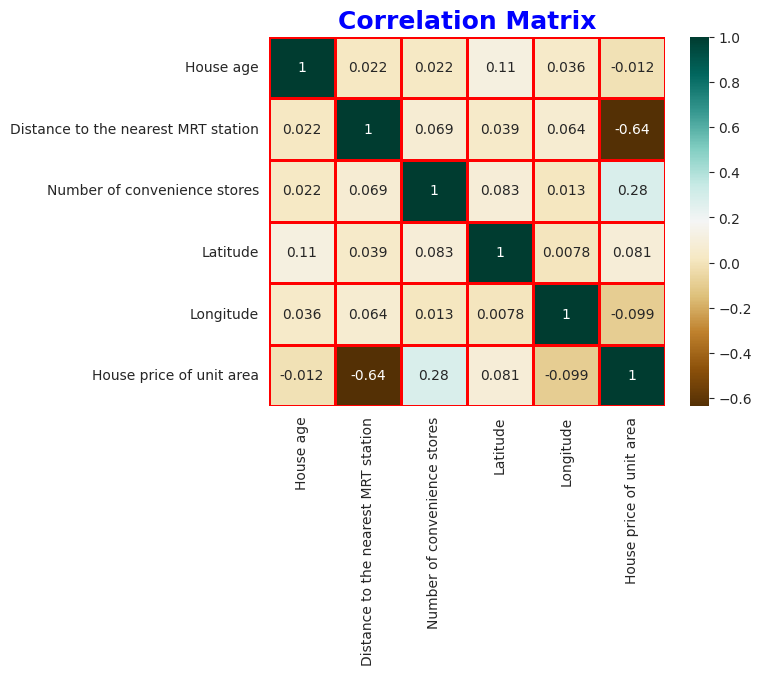

In [119]:
df=real_estate_data.select_dtypes(include=['number'])
sns.heatmap(df.corr(), annot=True, cmap="BrBG",linewidths=1,
                       linecolor='red')
plt.title('Correlation Matrix',fontsize=18, fontweight='bold', color='blue')
plt.show()

In [120]:
print(df.corr())

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

**Observations:**

**House Age:** This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.

**Distance to Nearest MRT Station:** Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.

**Number of Convenience Stores:** Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.

**Latitude and Longitude:** Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

## **4. Model Training & Testing**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [122]:
# Selecting features and target variable
features = ['House age','Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'
X = real_estate_data[features]
y = real_estate_data[target]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
#MinMax Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

#Standard Scaling
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [124]:
# Apply PCA (Keep 95% Variance)
pca = PCA(n_components=0.95)
X_train_minmax_pca = pca.fit_transform(X_train_minmax)
X_test_minmax_pca = pca.transform(X_test_minmax)
X_train_standard_pca = pca.fit_transform(X_train_standard)
X_test_standard_pca = pca.transform(X_test_standard)
# Check Which Features PCA Removed
# Identify Removed Features
initial_features = X.shape[1]
remaining_features = pca.n_components_
removed_features = list(set(X.columns) - set(feature_importance.columns))
print(f"Total Features Before PCA: {initial_features}")
print(f"Total Features After PCA: {remaining_features}")
print(f"Removed Features by PCA: {removed_features}")


Total Features Before PCA: 5
Total Features After PCA: 5
Removed Features by PCA: ['House age']


In [125]:
# Models initialization
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2 Score": r2}


In [126]:
# Train and test models
results = {}

for name, model in models.items():
    # Choose the right scaling
    if name in ["Linear Regression", "SVM"]:
        X_train_scaled, X_test_scaled = X_train_standard_pca, X_test_standard_pca
    elif name in ["KNN", "Gradient Boosting"]:
        X_train_scaled, X_test_scaled = X_train_minmax_pca, X_test_minmax_pca
    else:  # Decision Tree & Random Forest (No scaling needed)
        X_train_scaled, X_test_scaled = X_train, X_test

    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("Model Performance:\n", results_df)

Model Performance:
                          MAE       RMSE  R2 Score
Linear Regression   9.518530  11.162844  0.549566
Decision Tree      12.017132  15.453007  0.136807
Random Forest       9.879383  11.584381  0.514904
SVM                11.699300  13.580869  0.333290
KNN                10.297882  12.393288  0.444793
Gradient Boosting  10.362548  12.544699  0.431144


<ipython-input-127-ae0b925c41f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x=results_df.index, y="R2 Score", palette="coolwarm", edgecolor="black")


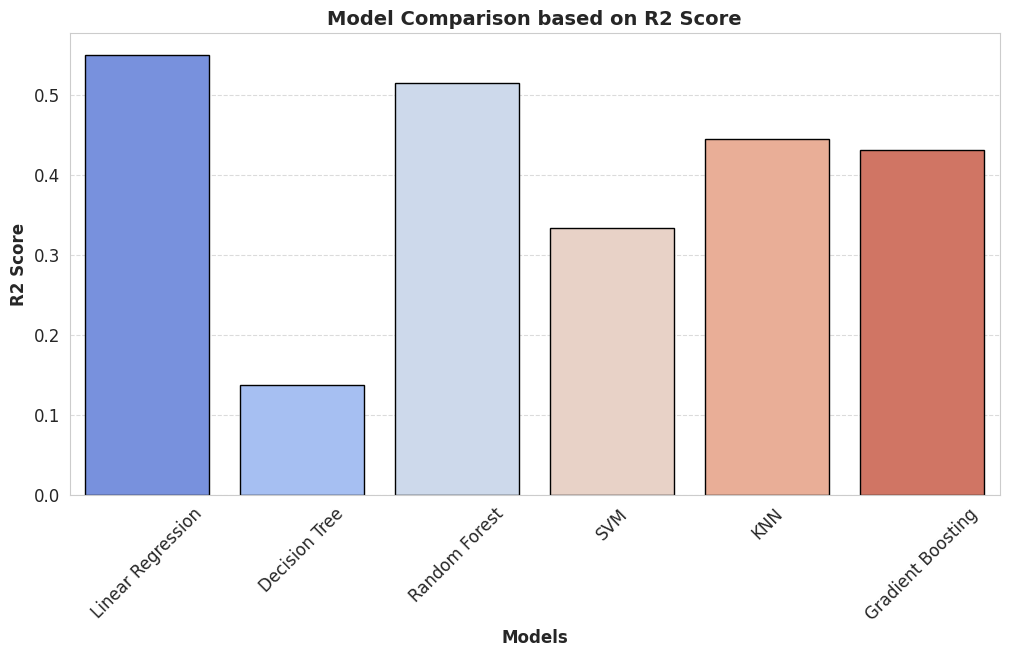

In [127]:
#Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x=results_df.index, y="R2 Score", palette="coolwarm", edgecolor="black")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Model Comparison based on R2 Score", fontsize=14, fontweight='bold')
plt.xlabel("Models", fontsize=12, fontweight='bold')
plt.ylabel("R2 Score", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()